<a href="https://colab.research.google.com/github/hbaflast/deep-learning-tutorial-fr/blob/main/classification_texte_correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification de texte - IMBD**


Dans cet exercice vous allez mettre en place un réseau de neurones étant capable de classifier des critiques de cinéma selon si elles sont bonnes ou mauvaises. C'est un exemple classique de classification binaire, un problème que l'on rencontre très souvent en machine learning.

On utilise pour cela le jeu de données [IMBD](https://www.imdb.com/) qui contient 50.000 critiques de films.

## 1 - **Importation de module**

**Importer les modules Tensorflow, Numpy et pylot de Matplotlib**

Nous allons traiter cet excercice avec la bibliotèque de deep learning Keras

In [ ]:
import numpy as np

import tensorflow as tf

import matplotlib.pyplot as plt

Using TensorFlow backend.


 **Afficher le GPU de la machine**
 
 Vérifions que le GPU de l'environnement de travail est bien activé

In [ ]:
! nvidia-smi

Thu Sep  6 16:15:10 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.111                Driver Version: 384.111                   |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    25W / 149W |      0MiB / 11439MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## 2 - **Importation et Exploration des données**

**Importer le jeu de données de puis Keras**

Le jeu de données IMDB est directement contenu dans Keras, car c'est un jeu de données très populaire sur lequel est effectué un grand nombre de benchmark d'algorithme.

Importer seulement les 10.000 mots les plus fréquents avec l'argument "num_words"


In [ ]:
from tensorflow.keras.datasets import imdb

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 4s 0us/step


**Afficher le jeu de données**

Affichons les données du jeu d'entrainement

In [ ]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

Puis les labels du jeu d'entrainement

In [ ]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

**Que remarque-t-on ?**

**De quels types sont les données et leurs labels ?**

---



*Les données sont déjà processées.*

*Les données sont un array de listes d'entier et les labels un array d'entier.*

**Afficher la taille du jeu de données**

Affichons la taille du jeu d'entrainement dans un premier temps



In [ ]:
x_train.shape

(25000,)

Puis la taille du jeu de test dans un second temps

In [ ]:
x_test.shape

(25000,)

**Afficher la distribution des labels**

Faisons un graphe de la distribution des labels du jeu d'entrainement

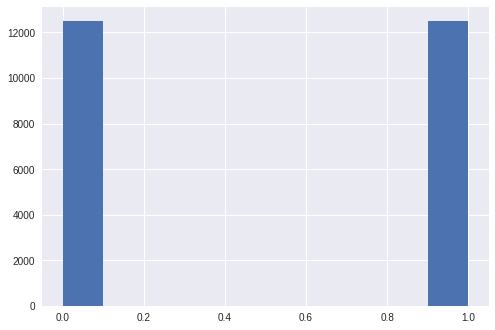

In [ ]:
plt.hist(y_train);

Et des labels du jeu de test

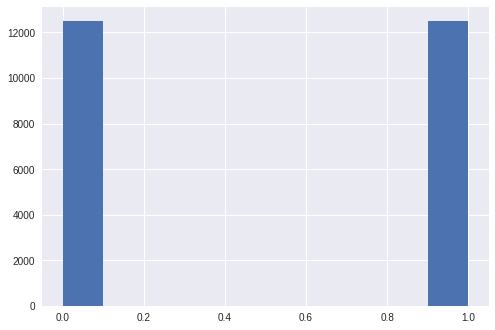

In [ ]:
plt.hist(y_test);

**Que remarque-t-on ?**

---



*Les données sont parfaitement balancées*

**Afficher la taille de la première et de la deuxième phrase**

In [ ]:
print("Taille de la première phrase : " + str(len(x_train[0])))
print("Taille de la deuxième phrase : " + str(len(x_train[1])))

Taille de la première phrase : 218
Taille de la deuxième phrase : 189


**Que remarque-t-on ?**

---



*Les phrases ne sont pas de la même longueur. *

** Faire une fonction permettant d'afficher la distribution de la longueur des phrases du jeu de données**

In [ ]:
def plot_len_distribution(dataset):
  len_list = []
  for list_ in dataset:
    len_ = len(list_)
    len_list.append(len_)
  plt.hist(len_list);

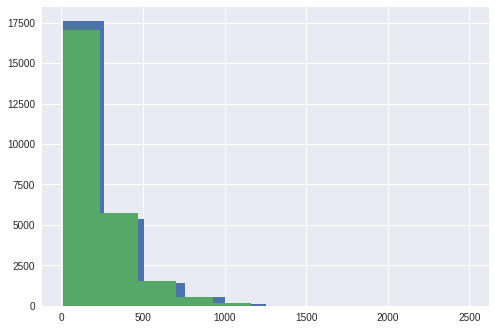

In [ ]:
plot_len_distribution(x_train)
plot_len_distribution(x_test)

 **Décodage des vecteurs**

On a pu observer que le jeu de données a été processé.
Une critique est ici une liste d'entiers qui représente un mot.

En ce qui concerne les labels : 0 repésente une critique négative et 1 une critique positive

Il peut être intéressant de reconvertir les nombres en phrases



**Importer l'index des mots avec la méthode get_word_index de la classe imbd**

In [ ]:
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 1s 1us/step


**Afficher l'index des mots**

In [ ]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

Ici on vient ajouter des items à notre dictionnaire afin de gérer la reconversion en phrases

In [ ]:
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

**Créer un dictionaire qui est l'inverse de celui là afin de reconvertir les nombres en phrases**

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

**Créer une fonction qui permet de décoder une phrase**

In [ ]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

**Décoder la première phrase**

In [ ]:
decode_review(x_train[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

## **3 - Préparation des données**

Les phrases doivent toutes être de la même longueur en entrée du réseau de neurones.

Pour cela nous utilisons la fonction pad_sequences provenant du sous modules preprocessing.sequence de keras

**Importer la fonction pad_sequences**

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

**Utiliser la fonction afin de transformer le jeu d'entrainement et le jeu de test**

On veut avoir une taille max des arrays de 256 et rajouter des 0 à la fin si la phrase est plus courte

In [ ]:
X_train = pad_sequences(x_train,
                        value=word_index["<PAD>"],
                        padding='pre',
                        maxlen=256)

X_test = pad_sequences(x_test,
                       value=word_index["<PAD>"],
                       padding='pre',
                       maxlen=256)

**Afficher la taille du jeu d'entrainement **

In [ ]:
X_train.shape

(25000, 256)

**Que remarque-t-on ?**

---



*On a cette fois ci la deuxième dimension de la taille de notre array qui s'affiche ce qui veut dire qu'on a une taille fixe pour cette dimension.*

**Afficher maintenant la première phrase**

In [ ]:
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    1,   14,   22,   16,   43,  530,
        973, 1622, 1385,   65,  458, 4468,   66, 3941,    4,  173,   36,
        256,    5,   25,  100,   43,  838,  112,   50,  670,    2,    9,
         35,  480,  284,    5,  150,    4,  172,  112,  167,    2,  336,
        385,   39,    4,  172, 4536, 1111,   17,  546,   38,   13,  447,
          4,  192,   50,   16,    6,  147, 2025,   19,   14,   22,    4,
       1920, 4613,  469,    4,   22,   71,   87,   12,   16,   43,  530,
         38,   76,   15,   13, 1247,    4,   22,   17,  515,   17,   12,
         16,  626,   18,    2,    5,   62,  386,   12,    8,  316,    8,
        106,    5,    4, 2223, 5244,   16,  480,   66, 3785,   33,    4,
        130,   12,   16,   38,  619,    5,   25,  1

**Que remarque-t-on ?**

---



*Les zeros à la fin de notre array afin de compléter la taille de la phrase.*

## **4. Définition du modèle**

**Importer les classes et fonctions nécessaire à la construction d'un modèle**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam

**Faire une fonction permetant de créer un modèle**

Nous sommes ici dans un cas de classification binaire il faut donc choisir la fonction de coût et la fonction d'activation de la dernière couche qui correspond au problème.

In [ ]:
def create_model():
  
  num_words = 10000
  
  model = Sequential()
  model.add(Embedding(num_words, 32, input_length=256))
  model.add(LSTM(128))
  model.add(Dense(1, activation='sigmoid'))
  
  opt = Adam(lr=0.001)
  
  model.compile(loss='binary_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])
  
  return model

**Afficher un résumé de votre modèle**

In [ ]:
model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 256, 32)           320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               82432     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 402,561
Trainable params: 402,561
Non-trainable params: 0
_________________________________________________________________


**Entrainer le modèle**

On va conserver l'historique de l'entrainement du modèle afin d'evaluer sa progression par la suite.

On utilisera un jeu de validation correspondant à la moitié du jeu d'entrainement.

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=10,
                    validation_split=0.5,
                    shuffle=True)

Train on 12500 samples, validate on 12500 samples
Epoch 1/10
12500/12500 [==============================] - 38s 3ms/step - loss: 0.6818 - acc: 0.5502 - val_loss: 0.6650 - val_acc: 0.5842
Epoch 2/10
12500/12500 [==============================] - 37s 3ms/step - loss: 0.6333 - acc: 0.6946 - val_loss: 0.6132 - val_acc: 0.6776
Epoch 3/10
12500/12500 [==============================] - 37s 3ms/step - loss: 0.5277 - acc: 0.7678 - val_loss: 0.4500 - val_acc: 0.7949
Epoch 4/10
12500/12500 [==============================] - 37s 3ms/step - loss: 0.3210 - acc: 0.8647 - val_loss: 0.3713 - val_acc: 0.8429
Epoch 5/10
12500/12500 [==============================] - 36s 3ms/step - loss: 0.2274 - acc: 0.9139 - val_loss: 0.3508 - val_acc: 0.8546
Epoch 6/10
12500/12500 [==============================] - 37s 3ms/step - loss: 0.1713 - acc: 0.9412 - val_loss: 0.3589 - val_acc: 0.8583
Epoch 7/10
12500/12500 [==============================] - 36s 3ms/step - loss: 0.1267 - acc: 0.9579 - val_loss: 0.3918 - val_acc

**Evaluer le modèle sur le jeu de test**

Afficher la loss et l'accuracy du modèle

In [ ]:
scores = model.evaluate(X_test, y_test, batch_size=512, verbose=1, )
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

25000/25000 [==============================] - 7s 284us/step
Test loss: 0.51286800989151
Test accuracy: 0.8471999995231628


**Quelle accuracy obtenez-vous ?**

---



*85% d'accuracy*

**Afficher les courbes de loss**

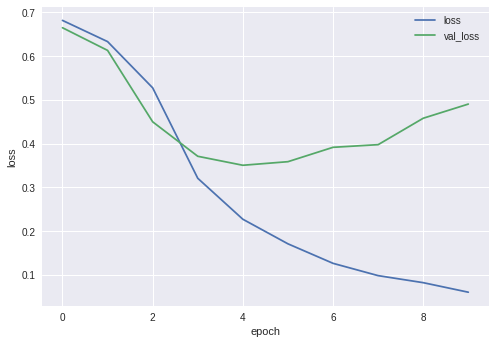

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

## **5 - Visualisation des prédictions**

**Effectuer les prédictions du modèle sur le jeu de test**

In [ ]:
y_pred = model.predict(X_test, batch_size=512, verbose=1)

25000/25000 [==============================] - 7s 289us/step


**Afficher les prédictions**

In [ ]:
y_pred

array([[0.05476511],
       [0.9991611 ],
       [0.98707926],
       ...,
       [0.02147439],
       [0.05483437],
       [0.992388  ]], dtype=float32)

**Que remarque-t-on ?**

---



*On obtient des probabilités en prediction.*

**Transformer les prédicitions**

Transformons les prédictions afin de ne plus avoir la probabilité mais si un commentaire est bon ou mauvais

In [ ]:
Y_pred = np.where(y_pred > 0.5, 1, 0)

**Afficher 10 predictions aléatoirement choisies**

Affichons les 10 phrases et la prédiction pour chacune

In [ ]:
for i in range(10):
  ix = np.random.choice(len(Y_pred))
  pred = Y_pred[ix]
  pred = (lambda x: 'Bon commentaire' if x == 1 else 'Mauvais commentaire')(pred)
  phrase = x_test[ix]
  phrase = decode_review(phrase)
  print(pred)
  print(phrase)
  print('---------------------------------')

Bon commentaire
<START> if it had been made 2 years later it would have been banned the number one must see recommendation of the day the best <UNK> film i have seen this far have but have not yet seen j h br br there's no wonder why this film got less than 200 votes a bigger that could not care less about what's proper would not be seen again until the 60's as morally ambiguous and dark as 70's <UNK> but with a certain charm as well of course this had to lay low in the later 30's and sadly it does not appear to have been re discovered br br seriously this got it all great actors gary cooper sylvia sidney and the this time not so lovable guy <UNK> and a mighty good director this far i haven't been biggest fans but i have liked his films a lot and with this he steps into a new league one of the best 30's films i have ever seen this is something i never thought even existed 9 5 10
---------------------------------
Mauvais commentaire
<START> you see a movie titled what are you going to t

**Afficher 10 predictions où le modèle s'est trompé**

Affichons 10 phrases et la prédiction pour chacune

In [ ]:
Y_pred = np.hstack(Y_pred)

In [ ]:
ix_wrong_pred = np.where(Y_pred != y_test)[0]

In [ ]:
ix_wrong_pred.shape

(3820,)

In [ ]:
for i in range(10):
  ix = np.random.choice(ix_wrong_pred)
  pred = Y_pred[ix]
  pred = (lambda x: 'Bon commentaire' if x == 1 else 'Mauvais commentaire')(pred)
  ground_truth = y_test[ix]
  ground_truth = (lambda x: 'Bon commentaire' if x == 1 else 'Mauvais commentaire')(ground_truth)
  phrase = x_test[ix]
  phrase = decode_review(phrase)
  print('Ground truth :',ground_truth, '| Prediction :', pred)
  print(phrase)
  print('---------------------------------')

Ground truth : Mauvais commentaire | Prediction : Bon commentaire
<START> i've been a classic horror fan my entire life many nights stretched until the early hours of the morning watching the universal films on horror <UNK> and creature feature night sadly i viewed this film in the early evening and yet it still almost put me to sleep br br i don't think i've ever seen a horror picture where everything was so matter of fact dr doesn't seem to believe in the supernatural yet before long he's <UNK> treating dracula and watching larry <UNK> change into the <UNK> while hardly <UNK> an eye he and <UNK> discover the frankenstein monster like it's an everyday <UNK> is all fired up to bring the monster back to life but after <UNK> and nina protest he's like <UNK> you're right no big deal after realizing <UNK> <UNK> he opens the <UNK> coffin to <UNK> and <UNK> he's gone just like that br br the only person who didn't appear to just be <UNK> in her lines was jane adams as nina her reward is gett

# Fin